[View in Colaboratory](https://colab.research.google.com/github/IrfanKhalid/Data-Science/blob/master/Copy_of_Copy_of_Muhammad_Irfan_Khalid_Information_Retrieval_Assignment_1.ipynb)

# Information and Text Retrieval Systems
## Assignment 1

#### Muhammad Irfan Khalid
#### MSDS:18036

We hope you have learned a lot in your classes, now is the time to implement and test your concepts. Since many of you are beginners in python programming puch of the assignment has already been written for you. Your task is to fill the missing lines in the functions, write some new functions etc. There is enough hints and guideline given that you can easily complete this assignment on your own.

to give you an over all view, we are going to read some documents and compute tfidf for everyword in the document, then you will be asked to make different plots and run different querries.

let us first import the librarys we will be using.

In [0]:
import os
from string import punctuation as puncs
import math
import numpy as np
import matplotlib.pyplot as plt


Let us now define path of our dataset here, replace path string with the address of dataset in your PC. You can notice here that backward slash is replaced with double backward slashes. This is needed in windows based systems, if you are using *NIX* kernel machines then it may be extra step for you. Since the default address works just fine. Though it might be a good practice to use double backward slashes as yourcode will become robust of environment.

In [0]:
## define path of your dataset folder here:
path = 'E:\\datasets\\IR\\subset\\'

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/"My Drive"/"ACL txt.zip"


'drive/My Drive/ACL txt.zip'


In [0]:
!unzip drive/"My Drive"/"ACL txt.zip"

Archive:  drive/My Drive/ACL txt.zip
   creating: ACL txt/
  inflating: ACL txt/A00-1000.pdf.txt  
  inflating: ACL txt/A00-1001.pdf.txt  
  inflating: ACL txt/A00-1002.pdf.txt  
  inflating: ACL txt/A00-1003.pdf.txt  
  inflating: ACL txt/A00-1004.pdf.txt  
  inflating: ACL txt/A00-1005.pdf.txt  
  inflating: ACL txt/A00-1006.pdf.txt  
  inflating: ACL txt/A00-1007.pdf.txt  
  inflating: ACL txt/A00-1008.pdf.txt  
  inflating: ACL txt/A00-1009.pdf.txt  
  inflating: ACL txt/A00-1010.pdf.txt  
  inflating: ACL txt/A00-1011.pdf.txt  
  inflating: ACL txt/A00-1012.pdf.txt  
  inflating: ACL txt/A00-1013.pdf.txt  
  inflating: ACL txt/A00-1014.pdf.txt  
  inflating: ACL txt/A00-1015.pdf.txt  
  inflating: ACL txt/A00-1016.pdf.txt  
  inflating: ACL txt/A00-1017.pdf.txt  
  inflating: ACL txt/A00-1018.pdf.txt  
  inflating: ACL txt/A00-1019.pdf.txt  
  inflating: ACL txt/A00-1020.pdf.txt  
  inflating: ACL txt/A00-1021.pdf.txt  
  inflating: ACL txt/A00-1022.pdf.txt  
  inflating: ACL txt/

In [0]:
path= "ACL txt"


Here you are making list of all the .txt extension files in your path folder. This list will allow you to read all the files in one loop without exclusively giving path to individual txt files.

In [0]:

## make a list of all txt files path

txtFiles = []

for fileName in os.listdir(path):
    if fileName.endswith('.txt'):
        txtFiles.append(path+"/"+fileName)
#print(len(txtFiles),txtFiles)

In [0]:
#import pandas as pd
for 
with open(txtFiles[0], 'r',encoding='unicode_escape') as myfile:
    data=myfile.read().replace('\n', '')
    
data

to help you further you are given with sample inputs at each stage to test your functions, so you have a sample text here that you may use to make sure you have written appropriate functions.

In [0]:
sampleText="Association for Computational Linguistics 6 th Applied Natural Language Processing Conference Proceedings\
of the Conference April 29--May 4, 2000 Seattle, Washington, USA ANLP 2000-PREFACE 131 papers were submitted to ANLP-2000. \
46 were accepted for presentation at the conference. Papers came from 24 countries: fifty eight from the \
United States of America, eleven each from Germany and United Kingdom, nine from Canada, eight from Japan, \
four each from Italy and Spain, three each from France, Korea and Switzerland, two each from Australia, \
China, The Netherlands and Sweden and one each from Czech Republic, Denmark, Finland, Greece, India, Hong Kong, \
Malaysia, Norway, Russia and Taiwan. 40 papers were submitted from industry. 85 papers came from academia. \
2 papers were submitted from government organizations and four submissions were combined. The reviewing process \
was supported by a web-based reviewer interface developed by Elisha Kane at New Mexico State University's Computing \
Research Lab. Linda Fresques of CRL coordinated the refereeing process. I would like to express my gratitude \
to and appreciation of the Program Committee members responsible for the six areas: Lynn Carlson, Tools and \
Resources for Developing NLP Systems Subcommittee Eduard Hovy, Integrated NLP Systems Subcommittee Richard Kittredge, \
Multilingual Text Processing Subcommittee Ray Perrault, Spoken Language Systems Subcommittee Oliviero Stock, \
Monolingual Text Processing Systems Subcommittee John White, Evaluation Subcommittee The following colleagues \
did Doug Appelt Fabio Ciravegna Robert Dale Michael Elhadad Ralph G-rishman Lynette Hirschman Yuval Krymolowski \
Inderjeet Mani Zvi Marx Martha Palmer Harold Somers Toshiyuki Takezawa Takehito Utsuro Dekai Wu the bulk of the \
reviewing: Igor Boguslavsky Jim Cowie John Dowding Jim Glass Jan Haji~ Pierre IsabeIIe Alberto Lavelli Daniel Marcu \
David McDonald Owen Rainbow Tomek Strzalkowski Kathryn B. Taylor Pick Vossen R6mi Zajac David Carter Ido Dagan Andreas \
Eiscle Oren Glikman Donna Harman Tanya Korelsky Chin-Yew Lin Paul Martin Teruko Mitamura Norbert Reithinger Beth \
Sundheim Hans Uszkoreit Ralph Weischedel We believe that the quality of the papers selected is rather high and hope \
that the conference will be a success. Sergei Nirenburg Chair, Program Committee ANLP-2000 ANLPi "

This is your first task, you need to complete this function in such a way that it takes a txt file as input argument and returns a list of words in your document.

so if you enter sample text above, your output will be something like this
['Association', 'for', 'Computational', 'Linguistics', '6', 'th', 'Applied', 'Natural', 'Language', 'Processing', 'Conference', 'Proceedingsof', 'the', 'Conference', 'April', '29--May', '4,', '2000', 'Seattle,', 'Washington,', 'USA', 'ANLP', '2000-PREFACE', '131', 'papers', 'were', 'submitted',.....]

In [0]:
## function to read text and return list of words 
def wordList(doc):
    """
    This function should take text which is a string object and return all 
    the list of words in it in the same sequece as they appear in the document
    NOTE: you have to make sure your text has same case (lower/upper)
    """
    sList=[]
    for w in doc.split(" "):
      sList.append(w)
      #print(w)
        
    return sList


In [0]:
sList=wordList(sampleText)
print(sList)

Weldone! you must feel very happy! let us now implement each function below, you have been given sample inputs and your outputs  must be something corresponding to the examples given.

In [0]:
sampleList=["Association","for","Computational","Linguistics","6","th","Applied",
            "Natural","Language","Processing","Conference""Proceedingsof","the",
            "Conference","April","29--May","4,","2000"]

complete this function

In [0]:
###  function to remove puntuation marks from words
# import string.maketrans as textfilter
from string import punctuation as puncs
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))


def removePuncs(wordList):
    """
    This function will take a list of words, iterate over the list and remove punctation marks that appear in the word
    """
    
    slist=[]
    #print('punctuation marks are: ', puncs)
    for w in wordList:
      if w not in stop_words:
        slist.append( w.translate(str.maketrans({key: None for key in puncs})))
        
        #print(word)
    return slist

You are now required to write down exlplanation of the function above.




.

In [0]:
sampleList=["Association","for","Computational","Linguistics","6","th","Applied",
            "Natural","Language","Processing","Conference""Proceedingsof","the",
            "Conference","April","29--May","4,","2000"]

removePuncs(sampleList)

['Association',
 'Computational',
 'Linguistics',
 '6',
 'th',
 'Applied',
 'Natural',
 'Language',
 'Processing',
 'ConferenceProceedingsof',
 'Conference',
 'April',
 '29May',
 '4',
 '2000']

The function below has already been implemented for you, understand it well. It might help you ahead!

In [0]:
### function to calculate term frequency in the doc
def termFrequencyInDoc(wordList):
    """
    This function should take a list of words as input argument, and output a dictionary of words such that
    each word that appears in the document is key in the dictionary and it's value is term frequency
    """
    termFrequency_dic={}
    for w in wordList:
        if w in termFrequency_dic.keys():
            termFrequency_dic[w]+=1
        else:
            termFrequency_dic[w]=1
    return termFrequency_dic

In [0]:
termFrequencyInDoc(sList)



In [0]:
## function to calculate word Document frequency
def wordDocFre(dicList):
    """
    This function takes list of dictionary as input arguemnt, each dictionary in this list is the word that appears in the
    given document as keys and the no. of times the word appears as value. This function should construct a dictionary which
    has all the words that appear in the corpus as keys and no. of docs that contain this word as value
    """
    vocan={}
    for docDic in dicList:
        for keys in docDic.keys():
            if keys in vocan.keys():
                vocan[keys]+=1
                #print("hint: see termFrequencyInDoc() function")
            else:
                vocan[keys]=1
                #print("hint: see termFrequencyInDoc() function")
    return vocan
    

In [0]:
lista= []
lista.append(DF)
WordDF=wordDocFre(lista)
WordDF

In [0]:
## you should be well versed in syntax of creating functions by now !!
## construct a function named inverseDocFre() that takes dictionary returned from wordDocFre functions above
## and outputs inverse document frequency of each word. You can do it!

def inverseDocFre(dicList,DocumentCount,logbase):
  IMD={}
  for keys in dicList:    
    IMD[keys]=math.log(DocumentCount+1/dicList[keys],logbase)
  
  return IMD

In [0]:
inverseDocFre(WordDF,1)

In [0]:
### function to calculate tf-idf for everyword in doc
## this is your main function which calls the function above in appropriate fasion 

def tfidf(docList, logbase):
    """
    This function takes list of documents it calls the function wordList to split the document in list of words and remove
    stopwords and punctuation marks from them, then calls termFrequencyInDoc() uses its output to create 
    dictionary of vocabulary using the function wordDocFre(), it then should call inverseDocFre() function.
    it then outputs a list of dictionary, where each document corresponds to one dictionary, its words should be keys
    values should be tf-idf score
    """ 
    
    data={}
    DocumentFrequency=[]
    InverseDocumentFrequecy=[]
    dicList=[]
    dicTermFrequency=[]
    TermFrequency={}
    TFIDF={}
    #len(docList)
    for i in range(0,10):
        with open(txtFiles[i], 'r',encoding='iso-8859-1') as myfile:
          data[txtFiles[i]]=myfile.read().replace('\n', '')
        #print(data)        
        dicList=wordList(str(data))       
        dicList=removePuncs(dicList)
        dicTermFrequency.append(termFrequencyInDoc(dicList))
        TermFrequency[txtFiles[i]]=termFrequencyInDoc(dicList)
        TFIDF[txtFiles[i]]=TermFrequency[txtFiles[i]]
                        
        #print("This is easy-peasy, unless you were sleeping in class!")

    
    #print (dicTermFrequency)
    DocumentFrequency=wordDocFre(dicTermFrequency)
    #print(DocumentFrequency)
    InverseDocumentFrequecy=inverseDocFre(DocumentFrequency,10,logbase)
    #print(InverseDocumentFrequecy)
    #Multiply Term frequency and Inverse Document Frequency
    
    for keys in TermFrequency:      
      for value in TermFrequency[keys]:            
        TFIDF[keys][value]=TermFrequency[keys][value]*InverseDocumentFrequecy[value]
        
    return (TFIDF,InverseDocumentFrequecy,DocumentFrequency,TermFrequency)

In [0]:
wewwew=tfidf(txtFiles)

{'ACL': 10, 'txtW910109pdftxt': 10, 'REVERSIBLE': 10, 'MACHINE': 10, 'TRANSLATION': 10, 'WHAT': 10, 'TO': 10, 'DO': 10, 'WHEN': 10, 'THE': 10, 'LANGUAGES': 10, 'DONT': 10, 'LINE': 10, 'UP': 10, 'James': 10, 'Barnett': 10, 'Inderjeet': 10, 'Mani': 10, 'Paul': 10, 'Martin': 10, 'Elaine': 10, 'Rich': 10, 'MCC': 10, '3500': 10, 'West': 10, 'Balcones': 10, 'Center': 10, 'Dr': 10, 'Austin': 10, 'TX': 10, '78759': 10, 'Abst': 10, 'rac': 10, '': 10, 'In': 10, 'paper': 10, 'we': 10, 'deal': 10, 'issues': 10, 'face': 10, 'interlinguabased': 10, 'reversible': 10, 'machine': 10, 'translation': 10, 'system': 10, 'the': 10, 'literal': 10, 'meaning': 10, 'source': 10, 'text': 10, 'identical': 10, 'nat': 10, 'ural': 10, 'target': 10, 'We': 10, 'present': 10, 'algorithm': 10, 'lexical': 10, 'choice': 10, 'handles': 10, 'uch': 10, 'cases': 10, 'relies': 10, 'exclusively': 10, 'monolingual': 10, 'lin': 10, 'guistic': 10, 'descriptions': 10, 'languageindependent': 10, 'domain': 10, 'knowledge': 10, 'base'

#### sort vocabulary according to IDF-against K (number of documents containing that word) values and plot using matplotlib.pyplot

![image.png](attachment:image.png)

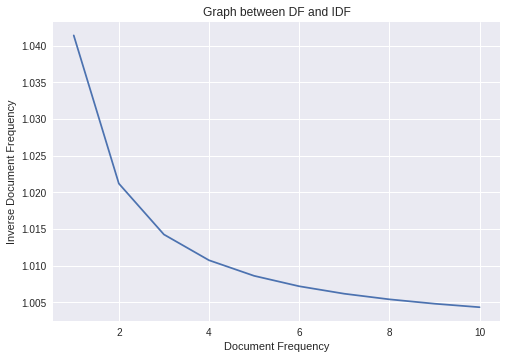

In [0]:
#@title Default title text
### your code here

import matplotlib.pyplot as plt


IDF=tfidf(txtFiles,10)[1]
DF=tfidf(txtFiles,10)[2]
#print(IDF)
#print(DF)
#print(InverseDocumentFrequecy)

plt.plot(DF.values(),IDF.values())
plt.xlabel("Document Frequency")
plt.ylabel("Inverse Document Frequency")
plt.title("Graph between DF and IDF")
plt.show()




#### construct a plot that shows how IDF-K relation changes as base of logarithm changes from 10 to -1.

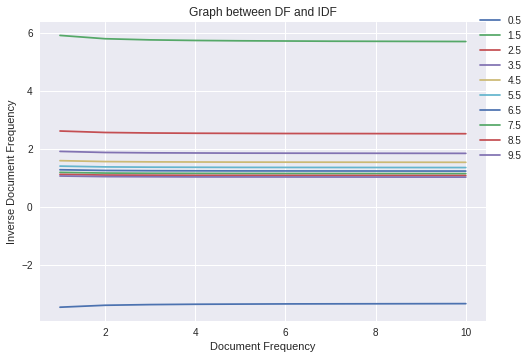

In [0]:
#@title Default title text
### yout code here

for i in np.arange(0.5,10, 1):
  IDF=tfidf(txtFiles,i)[1]
  DF=tfidf(txtFiles,i)[2]
  plt.plot(DF.values(),IDF.values(),label=i)
  

  
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Document Frequency")
plt.ylabel("Inverse Document Frequency")
plt.title("Graph between DF and IDF")  
plt.show()


#### construct a plot Term Frequency weight transformation such as this one
![image.png](attachment:image.png)


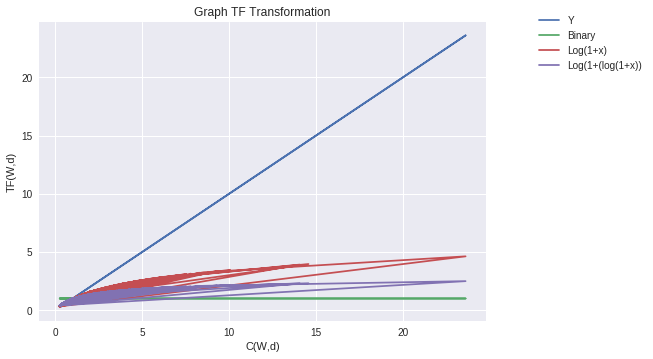

In [0]:
## your code here
TermFrequency=tfidf(txtFiles,i)[3]
TermFrequencyX=TermFrequency['ACL txt/W91-0109.pdf.txt'].values();
TermFrequencyY=TermFrequency['ACL txt/W91-0109.pdf.txt'].values();

plt.plot(TermFrequencyX,TermFrequencyY,label="Y")

TermFrequencyYa= list(map(lambda x: 1 if x >0 else 0 , TermFrequencyY))
plt.plot(TermFrequencyX,TermFrequencyYa,label="Binary")

TermFrequencyYb=list(map(lambda x: math.log(1+x,2) , TermFrequencyY))
plt.plot(TermFrequencyX,TermFrequencyYb,label="Log(1+x)")


TermFrequencyYb=list(map(lambda x: math.log((1+ math.log(1+x,2)),2) , TermFrequencyY))
plt.plot(TermFrequencyX,TermFrequencyYb,label="Log(1+(log(1+x))")


plt.xlabel("C(W,d)")
plt.ylabel("TF(W,d)")
plt.title("Graph TF Transformation")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


#### construct plot of BM25 as shown here
![image.png](attachment:image.png)

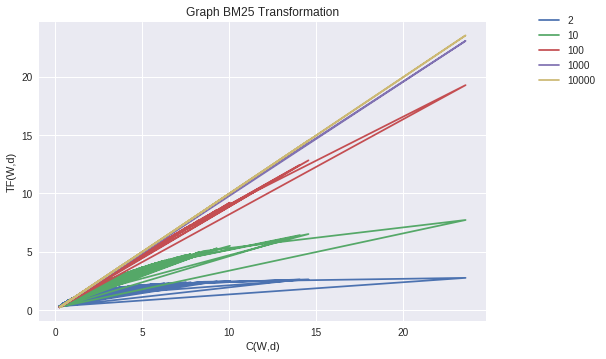

In [0]:
### your code here

TermFrequency=tfidf(txtFiles,i)[3]
TermFrequencyX=TermFrequency['ACL txt/W91-0109.pdf.txt'].values();
TermFrequencyY=TermFrequency['ACL txt/W91-0109.pdf.txt'].values();

#y=(k+1)x/x+k
Range =np.array([2,10,100,1000,10000])
for i in Range: 
  TermFrequencyYb=list(map(lambda x: ((i+1) * x)/(i+x)  , TermFrequencyY))
  plt.plot(TermFrequencyX,TermFrequencyYb,label=i)

plt.xlabel("C(W,d)")
plt.ylabel("TF(W,d)")
plt.title("Graph BM25 Transformation")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()




#### write code for SVM and run the following querry, your must show the top 5 documents ranked according to the score.
    1 Text Mining
    2 LDA
    3 topic modelling
    4 Natural language Processing
    5 generative models

1.   List item
2.   List item



In [0]:
### your code here

TF_IDF=tfidf(txtFiles,i)[0]





In [0]:
TF_IDF['Text']

def Query(string):
  


1.0043213737826424